In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of X:", X.shape)
print("Target distribution:")
print(y.value_counts())

Shape of X: (569, 30)
Target distribution:
1    357
0    212
Name: count, dtype: int64


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 455
Testing samples: 114


In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [28]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [29]:
def print_metrics(y_true, y_pred, y_prob, model_name):
    print(f"\n{model_name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_true, y_prob))

print_metrics(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
print_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")


Logistic Regression
Accuracy : 0.9736842105263158
Precision: 0.9722222222222222
Recall   : 0.9859154929577465
F1-score : 0.9790209790209791
ROC-AUC  : 0.99737962659679

Random Forest
Accuracy : 0.9649122807017544
Precision: 0.958904109589041
Recall   : 0.9859154929577465
F1-score : 0.9722222222222222
ROC-AUC  : 0.995250573206682


In [30]:
cv_lr = cross_val_score(lr, X_scaled, y, cv=5)
cv_rf = cross_val_score(rf, X_scaled, y, cv=5)

print("Logistic Regression CV Accuracy:", cv_lr.mean())
print("Random Forest CV Accuracy:", cv_rf.mean())

Logistic Regression CV Accuracy: 0.9806862288464524
Random Forest CV Accuracy: 0.9560937742586555


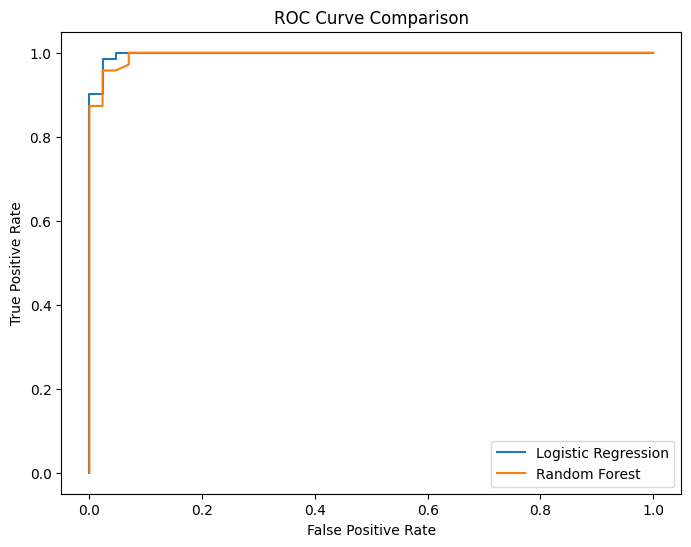

In [31]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## Conclusion

In this task, supervised classification models were built using the Breast Cancer dataset.
Both Logistic Regression and Random Forest models showed strong performance.

Logistic Regression achieved higher cross-validation accuracy and a slightly better ROC-AUC score,
indicating more stable and reliable performance.

Therefore, Logistic Regression was selected as the final model for this classification task.